#**Búsqueda de Conjuntos de Datos:**
* Buscar al menos cuatro conjuntos de datos en plataformas como Kaggle, UCI Machine Learning Repository o cualquier otra fuente confiable.
* Asegurarse de que los conjuntos de datos seleccionados sean diversos y cubran diferentes dominios y tipos de datos.

# Dataset

* [Students Performance in Exams](https://www.kaggle.com/datasets/spscientist/students-performance-in-exams/data)

# **Análisis Exploratorio de Datos (EDA) Inicial:**
* Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
* Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
* Documentar los hallazgos de cada EDA en un notebook de Jupyter.

# EDA Dataset IV

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("spscientist/students-performance-in-exams")

print("Path to dataset files:", path)

100%|██████████| 8.70k/8.70k [00:00<00:00, 14.0MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/spscientist/students-performance-in-exams/versions/1


In [2]:
import pandas as pd
# Ruta de archivo CSV
data = pd.read_csv(path + "/StudentsPerformance.csv")
# Mostrar registros
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95
996,male,group C,high school,free/reduced,none,62,55,55
997,female,group C,high school,free/reduced,completed,59,71,65
998,female,group D,some college,standard,completed,68,78,77


In [3]:
# hacer una copia del dato original
df = data.copy()
# Datos nulos
df.isna().sum()

,0
gender,0
race/ethnicity,0
parental level of education,0
lunch,0
test preparation course,0
math score,0
reading score,0
writing score,0


In [4]:
# Contar los valos unicos de df
df.nunique()

,0
gender,2
race/ethnicity,5
parental level of education,6
lunch,2
test preparation course,2
math score,81
reading score,72
writing score,77


In [5]:
# Informacion de DF
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [6]:
# Columnas númericas y categoricas
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

In [7]:
# Convertir columnas categoricas a tipo 'category'
df[categorical_cols] = df[categorical_cols].astype('category')

In [8]:
# Contar datos duplicardos
df.duplicated().sum()

0

In [9]:
# Valores unicos de columnas categoricas
for col in categorical_cols:
    print(f"Valores únicos en la columna '{col}':")
    print(df[col].unique())
    print()

Valores únicos en la columna 'gender':
['female', 'male']
Categories (2, object): ['female', 'male']

Valores únicos en la columna 'race/ethnicity':
['group B', 'group C', 'group A', 'group D', 'group E']
Categories (5, object): ['group A', 'group B', 'group C', 'group D', 'group E']

Valores únicos en la columna 'parental level of education':
['bachelor's degree', 'some college', 'master's degree', 'associate's degree', 'high school', 'some high school']
Categories (6, object): ['associate's degree', 'bachelor's degree', 'high school', 'master's degree',
                         'some college', 'some high school']

Valores únicos en la columna 'lunch':
['standard', 'free/reduced']
Categories (2, object): ['free/reduced', 'standard']

Valores únicos en la columna 'test preparation course':
['none', 'completed']
Categories (2, object): ['completed', 'none']



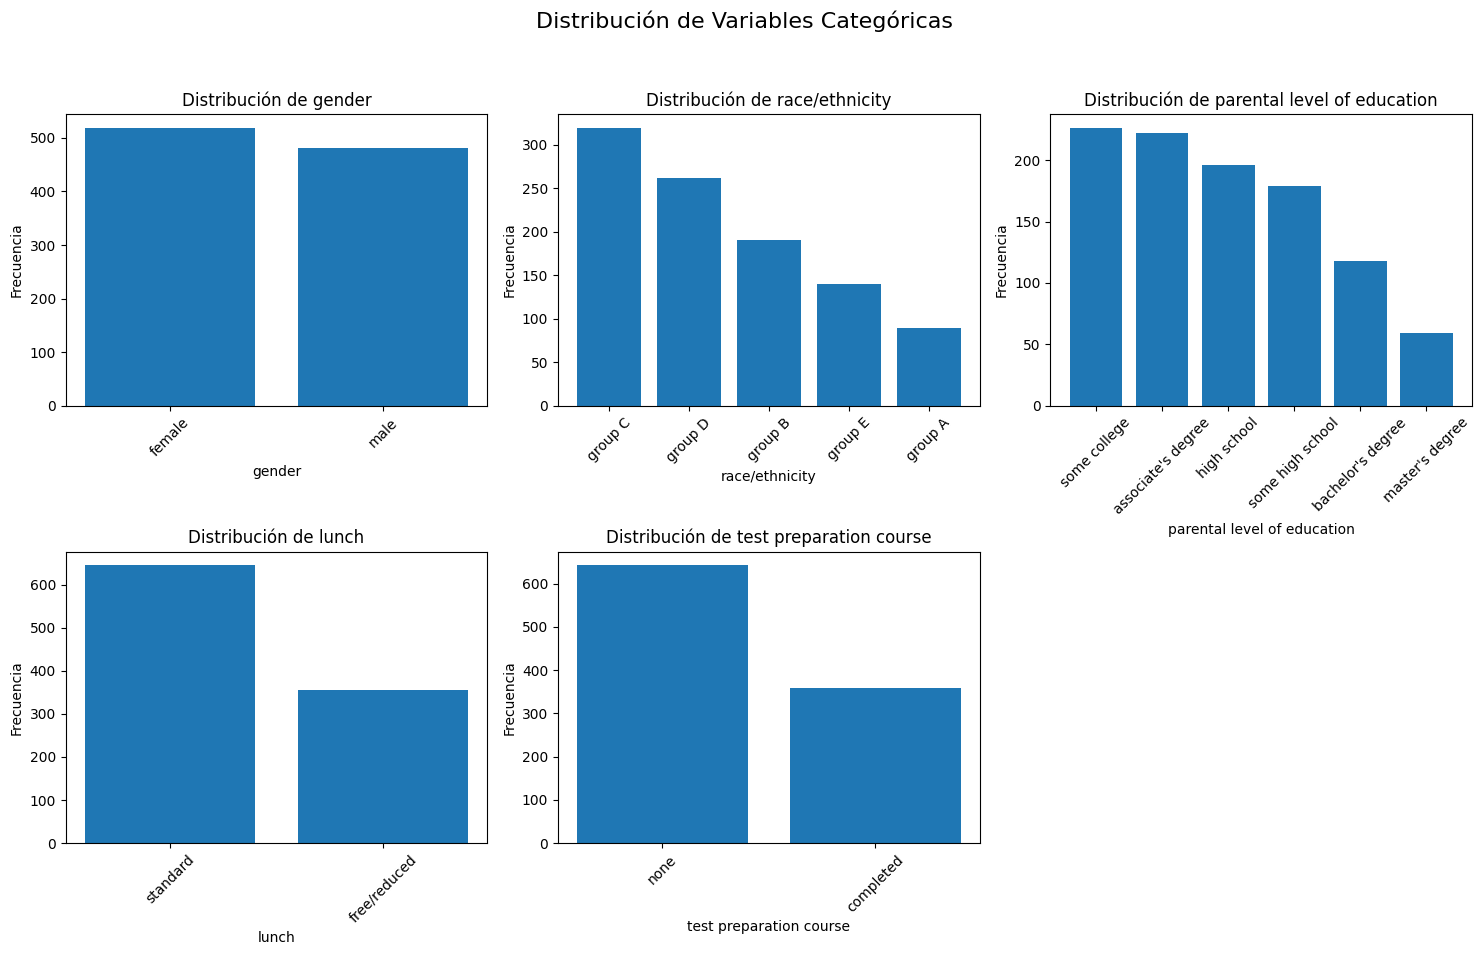

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Determinar el número de filas y columnas para los subplots
num_cols = 3  # Número de columnas en la cuadrícula de subplots
num_rows = (len(categorical_cols) + 1) // num_cols  # Calcula el número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Distribución de Variables Categóricas", fontsize=16)

# Aplanar el arreglo de ejes para iterar fácilmente
axes = axes.flatten()

for i, col in enumerate(categorical_cols):
    ax = axes[i]
    value_counts = df[col].value_counts()
    ax.bar(value_counts.index, value_counts.values)
    ax.set_title(f"Distribución de {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Frecuencia")
    ax.tick_params(axis='x', rotation=45)

# Eliminar cualquier subplot vacío si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [11]:
# Contador de genero y tipos de pago
df[['gender','parental level of education']].value_counts(ascending=True).to_dict()

{('male', "master's degree"): 23,
 ('female', "master's degree"): 36,
 ('male', "bachelor's degree"): 55,
 ('female', "bachelor's degree"): 63,
 ('male', 'some high school'): 88,
 ('female', 'some high school'): 91,
 ('female', 'high school'): 94,
 ('male', 'high school'): 102,
 ('male', "associate's degree"): 106,
 ('male', 'some college'): 108,
 ('female', "associate's degree"): 116,
 ('female', 'some college'): 118}

<ipython-input-12-c9c6dd2779d0>:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_education_counts = df.groupby(['gender', 'parental level of education']).size().reset_index(name='Counts')


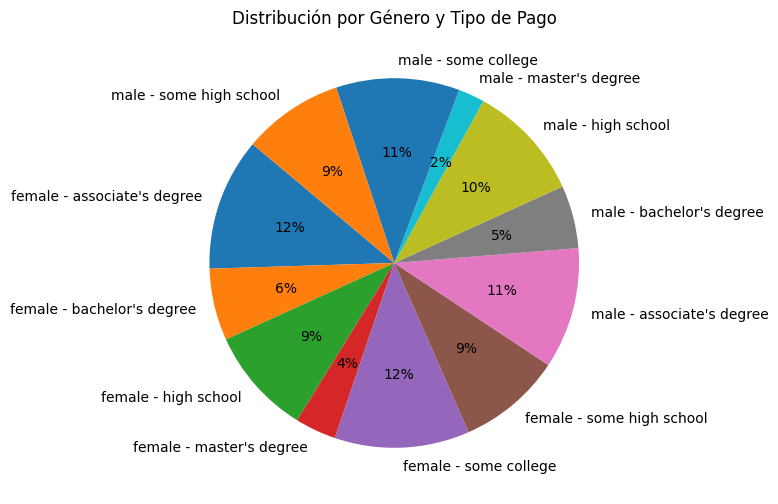

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Contar combinaciones de Gender y Payment
gender_education_counts = df.groupby(['gender', 'parental level of education']).size().reset_index(name='Counts')

# Preparar datos para el gráfico
labels = [f"{row['gender']} - {row['parental level of education']}" for _, row in gender_education_counts.iterrows()]
sizes = gender_education_counts['Counts']

# Crear gráfico de pastel
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%.0f%%', startangle=140)
plt.title('Distribución por Género y Tipo de Pago')
plt.show()

In [13]:
# Descripcion de datos númericos
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


               math score  reading score  writing score
math score       1.000000       0.817580       0.802642
reading score    0.817580       1.000000       0.954598
writing score    0.802642       0.954598       1.000000


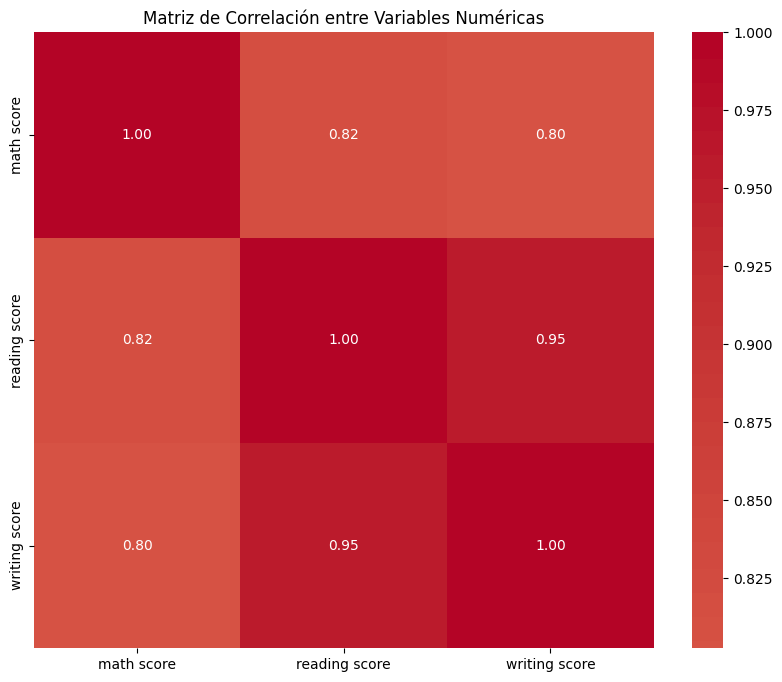

In [14]:
# Correlación de los datos numéricos
correlation_matrix = df[numerical_cols].corr()
print(correlation_matrix)

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, fmt=".2f")
plt.title('Matriz de Correlación entre Variables Numéricas')
plt.show()

In [15]:
# Sumas los valores numericos que son cero
print("Valore cero de math score",df[(df['math score'] == 0)].shape[0])
print("Valore cero de reading score",df[(df['reading score'] == 0)].shape[0])
print("Valore cero de writing score",df[(df['writing score'] == 0)].shape[0])

Valore cero de math score 1
Valore cero de reading score 0
Valore cero de writing score 0


In [16]:
# Eliminar la fila cuyo valor math score es cero
df = df[df['math score'] != 0]

In [17]:
# Función para identificar outliers usando IQR
def identify_outliers_iqr(df, columns):
    outlier_indices = []
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        # Definición de límites
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Identificación de outliers
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outlier_indices.extend(outliers.index.tolist())

    return set(outlier_indices)

# Identificando outliers en las variables numéricas
outlier_indices = identify_outliers_iqr(df, numerical_cols)
num_outliers = len(outlier_indices)
num_data = len(df)

print(f"Número total de outliers identificados: {num_outliers}")
print(f"Porcentaje de outliers: {(num_outliers / num_data) * 100:.2f}%")

Número total de outliers identificados: 11
Porcentaje de outliers: 1.10%


In [18]:
# Filtrar el DataFrame sin outliers
df_no_outliers = df.drop(index=outlier_indices)
print(f"Tamaño del DataFrame con outliers: {df.shape}")
print(f"Tamaño del DataFrame sin outliers: {df_no_outliers.shape}")

Tamaño del DataFrame con outliers: (999, 8)
Tamaño del DataFrame sin outliers: (988, 8)


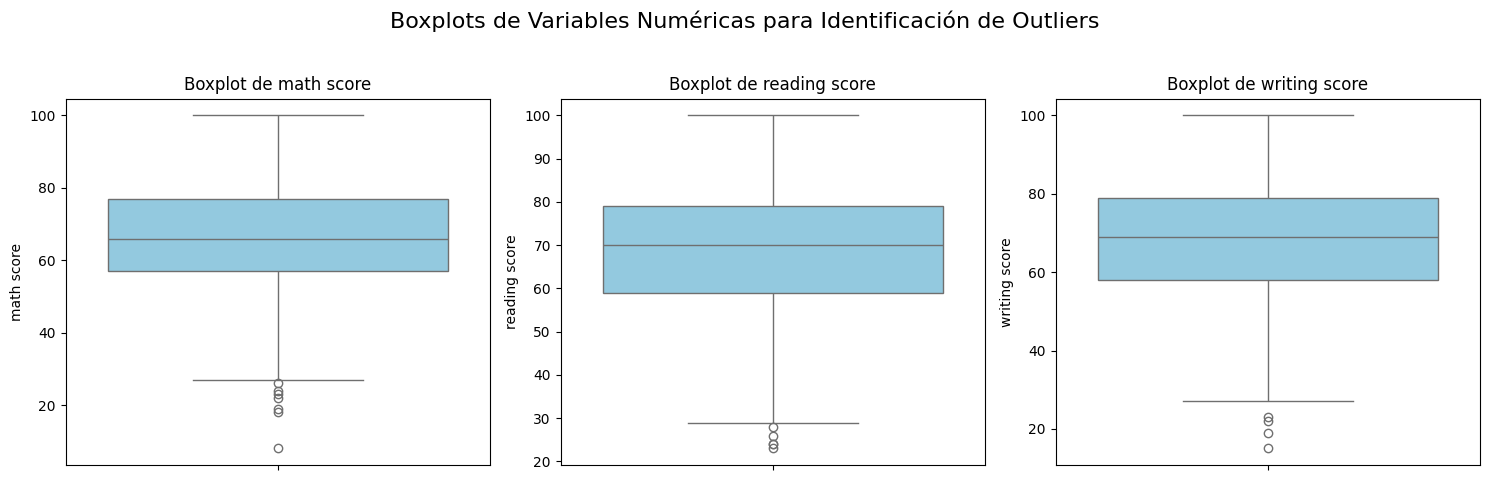

In [19]:
# Definir el tamaño del gráfico y la cuadrícula de subplots
num_cols = 3  # Número de columnas de subplots
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols  # Número de filas necesarias

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
fig.suptitle("Boxplots de Variables Numéricas para Identificación de Outliers", fontsize=16)

# Aplanar los ejes para iterar más fácilmente
axes = axes.flatten()

for i, col in enumerate(numerical_cols):
    ax = axes[i]
    sns.boxplot(data=df, y=col, ax=ax, color='skyblue')
    ax.set_title(f"Boxplot de {col}")

# Eliminar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Ajusta el espaciado para el título principal
plt.show()

In [20]:
# Filtrar el DataFrame sin outliers
df = df.drop(index=outlier_indices)

In [21]:
# Información de los datos limpios
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 988 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype   
---  ------                       --------------  -----   
 0   gender                       988 non-null    category
 1   race/ethnicity               988 non-null    category
 2   parental level of education  988 non-null    category
 3   lunch                        988 non-null    category
 4   test preparation course      988 non-null    category
 5   math score                   988 non-null    int64   
 6   reading score                988 non-null    int64   
 7   writing score                988 non-null    int64   
dtypes: category(5), int64(3)
memory usage: 36.5 KB


#**Diagnóstico y Selección de Problema:**
* Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.
* Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).
* Justificar la elección del problema y explicar por qué es relevante y desafiante.

# Dataset IV

**Diagnóstico:**
* Objetivo: Explorar los factores que afectan el rendimiento académico y predecir el puntaje de los estudiantes en diferentes materias.
* Desafíos: Identificar la influencia de factores demográficos y socioeconómicos en el rendimiento de los estudiantes.

**Problema Seleccionado:**
* Clasificación para predecir el rendimiento académico.

**Justificación:**
* La predicción del rendimiento puede ayudar a diseñar intervenciones educativas, identificando factores que afectan el desempeño.
* Es un problema desafiante porque el rendimiento depende de múltiples factores externos e internos, y existe complejidad en determinar cuáles influyen más en los resultados académicos.